<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

[Breast cancer wisconsin (diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [6]:
##The best practice for using multiple GPUs is to use tf.distribute.Strategy.
## This program will run a copy of your model on each GPU, splitting the input data between them, 
## also known as "data parallelism".


# tf.debugging.set_log_device_placement(True)

# strategy = tf.distribute.MirroredStrategy()
# with strategy.scope():
#   inputs = tf.keras.layers.Input(shape=(1,))
#   predictions = tf.keras.layers.Dense(1)(inputs)
#   model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
#   model.compile(loss='mse',
#                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.2))

In [7]:
# tf.debugging.set_log_device_placement(True)  #show GPU use

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

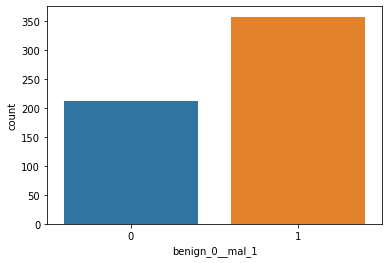

In [14]:
sns.countplot(x='benign_0__mal_1',data=df)

In [15]:
df.corr().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


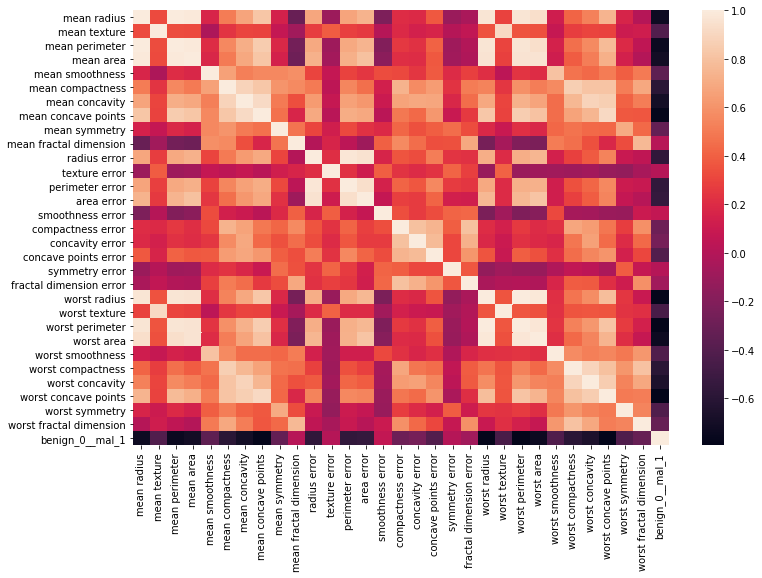

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [17]:
#df['column_name'].value_counts()
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [13]:
print(type(df.corr()['benign_0__mal_1'].sort_values())) #Series
print(len(df.corr()['benign_0__mal_1'])) #including last row, 'benign_0__mal_1'  -> 31
df.corr()['benign_0__mal_1'].sort_values()

<class 'pandas.core.series.Series'>
31


worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

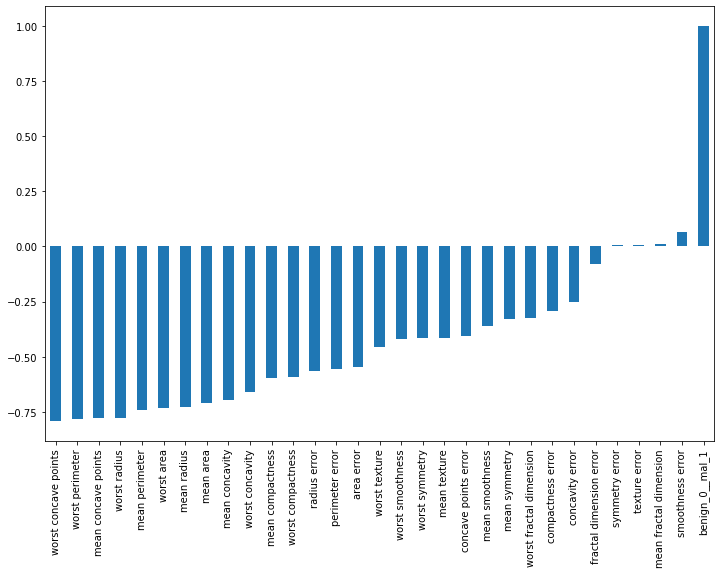

In [14]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [15]:
# test np_array[:-1] : default is row-wise.
testnp = np.arange(20).reshape(4,5)
print(testnp)
print("-------testnp[:-1]---------")
print(testnp[:-1]) #remove last row
print("==========testnp[:-1,:]=============")
print(testnp[:-1,:])
print('=---------testnp[:,:-1]----------=======')
print(testnp[:,:-1]) #remove last column 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
-------testnp[:-1]---------
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
==========testnp[:-1,:]=============
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
=---------testnp[:,:-1]----------=======
[[ 0  1  2  3]
 [ 5  6  7  8]
 [10 11 12 13]
 [15 16 17 18]]


(30,)


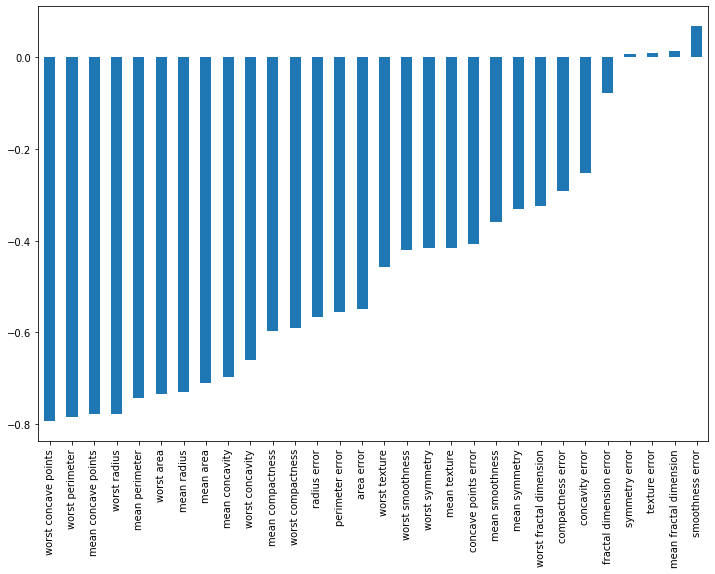

In [16]:
print(df.corr()['benign_0__mal_1'][:-1].sort_values().shape) #It's Series, so 1-D: 'benign_0__mal_1' removed -> 30
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar') #remove last Series element(benign_0__mal_1).

## Train Test Split

In [17]:
# X = df.drop('benign_0__mal_1',axis=1) #DataFrame
# print(type(X))
# X #features

In [18]:
X = df.drop('benign_0__mal_1',axis=1).values  #numpy.ndarray
print(type(X))
y = df['benign_0__mal_1'].values #numpy.ndarray
X

<class 'numpy.ndarray'>


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [21]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler() #shift + tab for detail !

In [24]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

* [tensorflow gpu usage manaul](https://www.tensorflow.org/guide/gpu)
* [keras multi gup traing](https://blog.datumbox.com/5-tips-for-multi-gpu-training-with-keras/)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [27]:
# To find out which devices your operations and tensors are assigned to, 
# put tf.debugging.set_log_device_placement(True) as the first statement of 
# your program. Enabling device placement logging causes 
# any Tensor allocations or operations to be printed.
tf.debugging.set_log_device_placement(True)

In [28]:
X_train.shape

(426, 30)

[choose the number of hidden layers](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)
* In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.

In [29]:
model0 = Sequential()


model0.add(Dense(units=30,activation='relu'))

model0.add(Dense(units=15,activation='relu'))


model0.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model0.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [30]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

with tf.device('/GPU:0'):
    model0.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

426/426 [==============================] - 0s 166us/sample - loss: 0.0497 - val_loss: 0.1161
Epoch 108/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0495 - val_loss: 0.1122
Epoch 109/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0487 - val_loss: 0.1130
Epoch 110/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0481 - val_loss: 0.1159
Epoch 111/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0490 - val_loss: 0.1166
Epoch 112/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0476 - val_loss: 0.1177
Epoch 113/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0457 - val_loss: 0.1192
Epoch 114/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0460 - val_loss: 0.1177
Epoch 115/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0466 - val_loss: 0.1179
Epoch 116/600
426/426 [============================

426/426 [==============================] - 0s 143us/sample - loss: 0.0265 - val_loss: 0.1495
Epoch 260/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0260 - val_loss: 0.1443
Epoch 261/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0265 - val_loss: 0.1507
Epoch 262/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0289 - val_loss: 0.1561
Epoch 263/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0326 - val_loss: 0.1414
Epoch 264/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0399 - val_loss: 0.1641
Epoch 265/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0328 - val_loss: 0.1423
Epoch 266/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0281 - val_loss: 0.1443
Epoch 267/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0271 - val_loss: 0.1469
Epoch 268/600
426/426 [============================

426/426 [==============================] - 0s 162us/sample - loss: 0.0121 - val_loss: 0.1883
Epoch 412/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0118 - val_loss: 0.1760
Epoch 413/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0166 - val_loss: 0.2366
Epoch 414/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0144 - val_loss: 0.1666
Epoch 415/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0176 - val_loss: 0.2073
Epoch 416/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0147 - val_loss: 0.1795
Epoch 417/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0131 - val_loss: 0.1894
Epoch 418/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0115 - val_loss: 0.1888
Epoch 419/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0116 - val_loss: 0.1967
Epoch 420/600
426/426 [============================

426/426 [==============================] - 0s 152us/sample - loss: 0.0147 - val_loss: 0.3546
Epoch 564/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0131 - val_loss: 0.2437
Epoch 565/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0058 - val_loss: 0.2762
Epoch 566/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0050 - val_loss: 0.2560
Epoch 567/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0052 - val_loss: 0.2734
Epoch 568/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0051 - val_loss: 0.2584
Epoch 569/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0059 - val_loss: 0.2851
Epoch 570/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0053 - val_loss: 0.2424
Epoch 571/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0049 - val_loss: 0.2638
Epoch 572/600
426/426 [============================

In [31]:
# model.history.history

In [32]:
model0_loss = pd.DataFrame(model0.history.history)

In [33]:
# model0_loss

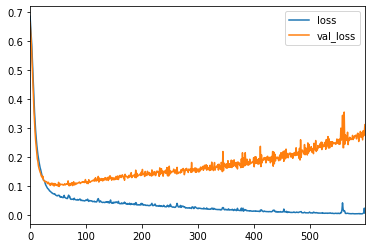

In [34]:
model0_loss.plot() #overfitting to training data set -> training too many epochs -> need early stopping. 
## training loss (blue line) is still going down, 
## but at certain point, valiadtion loss(orange line) is increasing 

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler() #shift + tab for detail !

In [37]:
scaler.fit(X_train1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [38]:
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [39]:
model1 = Sequential()
model1.add(Dense(units=30,activation='relu'))
model1.add(Dense(units=15,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [42]:
with tf.device('/GPU:1'):
    model1.fit(x=X_train1, 
          y=y_train1, 
          epochs=600,
          validation_data=(X_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/tas

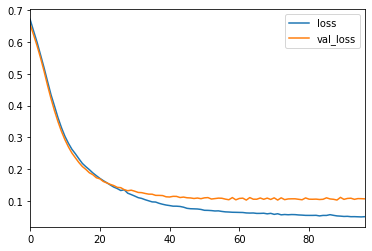

In [43]:
model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

## Example Three: Adding in DropOut Layers

In [1]:
from tensorflow.keras.layers import Dropout

* A dense(fully connected neural network) layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a: 
    * ``output = activation(dot(input, kernel) + bias)``
    *  **activation** is the element-wise activation function passed as the activation argument, **kernel** is a weights matrix created by the layer, and **bias** is a bias vector created by the layer.
* units: Positive integer, dimensionality of the output space.
![dense](dense.png)

* A dropout layer is similar except that when the layer is used, the activations are set to zero for some random nodes. This is a way to prevent overfitting. (float between 0 and 1)
    * Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. which helps prevent overfitting.
    * ``from keras.layers import Sequential
        model = Sequential()
        model.add(Dropout (0.2))
        model.add(Dense(10, activation = 'relu')``
![dropout](dropout.png)

```
# as first layer in a sequential model:
model = Sequential()

model.add(Dense(32, input_shape=(16,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32))
```

[Dense layere(Non linear layer)](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75)

In general, they have the same formulas as the linear layers wx+b, but the end result is passed through a non-linear function called Activation function.
``y = f(w*x + b) #(Learn w, and b, with f linear or non-linear activation function)``

The “Deep” in deep-learning comes from the notion of increased complexity resulting by stacking several consecutive (hidden) non-linear layers. Here are some graphs of the most famous activation functions:
![activation](activation.png)

$$Taylor Series:
f(a) + \frac{f'(a)}{1!} (x-a) + \frac{f''(a)}{2!} (x-a)^{2} + \frac{f'''(a)}{3!} (x-a)^{3} + \ldots 
$$
Intuitively, each non linear activation function can be decomposed to Taylor series thus producing a polynomial of a degree higher than 1. By stacking several dense non-linear layers (one after the other) we can create higher and higher order of polynomials. For instance, let’s imagine we use the following non-linear activation function: (y=x²+x). By stacking 2 instances of it, we can generate a polynomial of degree 4, having (x⁴, x³, x², x) terms in it. Thus the more layers we add, the more complex mathematical functions we can model.

In [46]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
model.fit(x=X_train1, 
          y=y_train1, 
          epochs=600,
          validation_data=(X_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/

426/426 [==============================] - 0s 174us/sample - loss: 0.1266 - val_loss: 0.0791
Epoch 117/600
426/426 [==============================] - 0s 176us/sample - loss: 0.1421 - val_loss: 0.0771
Epoch 118/600
426/426 [==============================] - 0s 165us/sample - loss: 0.1300 - val_loss: 0.0803
Epoch 119/600
426/426 [==============================] - 0s 177us/sample - loss: 0.1266 - val_loss: 0.0793
Epoch 120/600
426/426 [==============================] - 0s 178us/sample - loss: 0.1398 - val_loss: 0.0751
Epoch 121/600
426/426 [==============================] - 0s 182us/sample - loss: 0.1256 - val_loss: 0.0765
Epoch 122/600
426/426 [==============================] - 0s 181us/sample - loss: 0.1343 - val_loss: 0.0789
Epoch 123/600
426/426 [==============================] - 0s 182us/sample - loss: 0.1391 - val_loss: 0.0767
Epoch 124/600
426/426 [==============================] - 0s 163us/sample - loss: 0.1021 - val_loss: 0.0797
Epoch 125/600
426/426 [============================

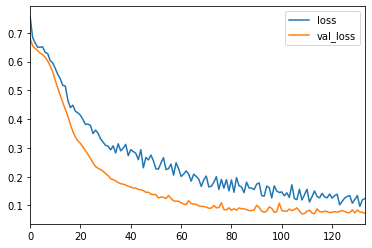

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

* predict will return the scores of the regression and predict_class will return the class of your prediction. 

    1. to predict if the picture is a dog or a cat (you have a classifier):
predict will return you: 0.6 cat and 0.2 dog (for example).
predict_class will return you cat

    2. to predict house prices (you have a regressor):
predict will return the predicted price
predict_class will not make sense here since you do not have a classifier

In [56]:
predictions = model.predict_classes(X_test)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_45200 in device /job:localhost/replica:0/task:0/device:GPU:0


In [57]:
from sklearn.metrics import classification_report,confusion_matrix

![precisionrecall](precisionrecall.png)

![pr1](pr1.png)

![pr2](pr2.png)
![pr3](pr3.png)

In [58]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



* confusion matrix

|    |    |Actual Positives |Actual Negatives |
|:---|:---|:------|:------|
|    |    |cat    |dog    |
|Predicted Positives|Cat|	5(TP)|	2(FP)|
|Predicted Negatives|Dog|	3(FN)|	3(TN)|

In [59]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [65]:
confusion_matrix(y_test,predictions).shape

(2, 2)

In [68]:
sum(confusion_matrix(y_test,predictions))

array([56, 87])

In [70]:
sum(sum(confusion_matrix(y_test,predictions)))

143

In [71]:
confusion_matrix(y_test,predictions).sum() #same as above .sum() == sum(sum(...))

143

In [73]:
print(y_test.shape)
len(y_test)

(143,)


143